In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

In [4]:
df.describe

<bound method NDFrame.describe of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27

In [5]:
df.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [6]:
df['children'].fillna(0, inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

C:\Users\Abhishek Garia\AppData\Local\Temp\ipykernel_19380\2384764343.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)
C:\Users\Abhishek Garia\AppData\Local\Temp\ipykernel_19380\2384764343.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [7]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d-%m-%y')

month_dict = {month: index for index, month in enumerate(calendar.month_name) if month}
df['arrival_date_month'] = df['arrival_date_month'].map(month_dict)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df_revenue = df.groupby(['arrival_date_year', 'arrival_date_month'])['adr'].mean().reset_index()
df_revenue.rename(columns={'arrival_date_year': 'year', 'arrival_date_month': 'month'}, inplace=True)
df_revenue['month'] = df_revenue['month'].astype(int)
df_revenue['date'] = pd.to_datetime(df_revenue.assign(day=1)[['year', 'month', 'day']])

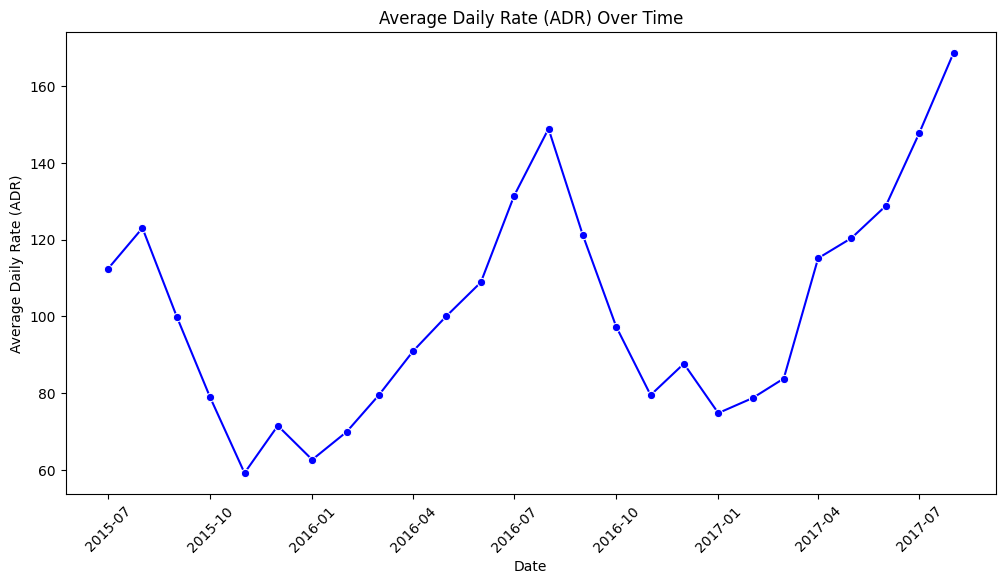

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='adr', data=df_revenue, marker='o', color='b')
plt.title("Average Daily Rate (ADR) Over Time")
plt.xlabel("Date")
plt.ylabel("Average Daily Rate (ADR)")
plt.xticks(rotation=45)
plt.show()

In [11]:
cancellation_rate = df['is_canceled'].mean() * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")



Cancellation Rate: 27.49%


In [12]:
top_countries = df['country'].value_counts().head(10)

C:\Users\Abhishek Garia\AppData\Local\Temp\ipykernel_19380\318446604.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="Blues_r")


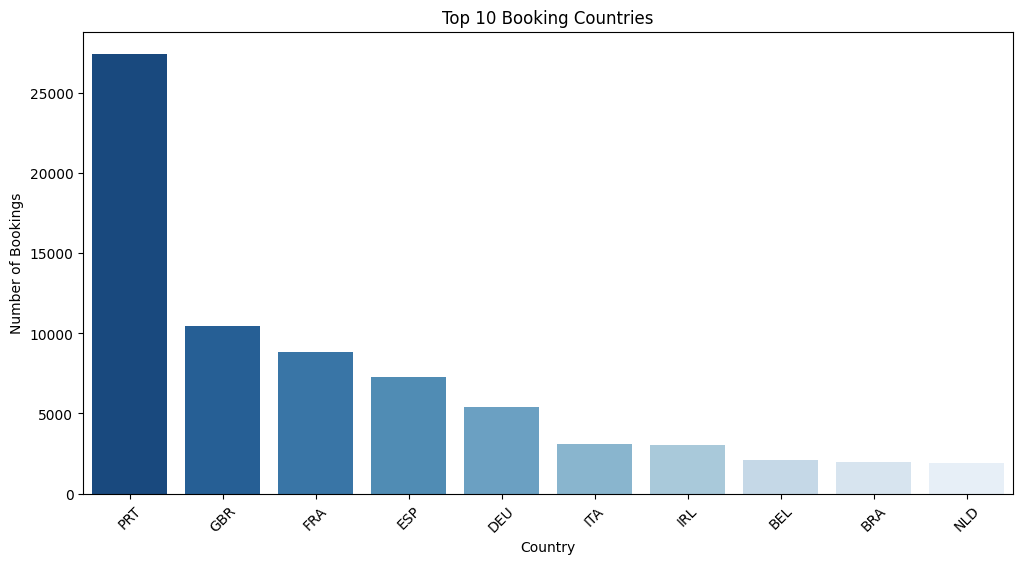

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="Blues_r")
plt.title("Top 10 Booking Countries")
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()

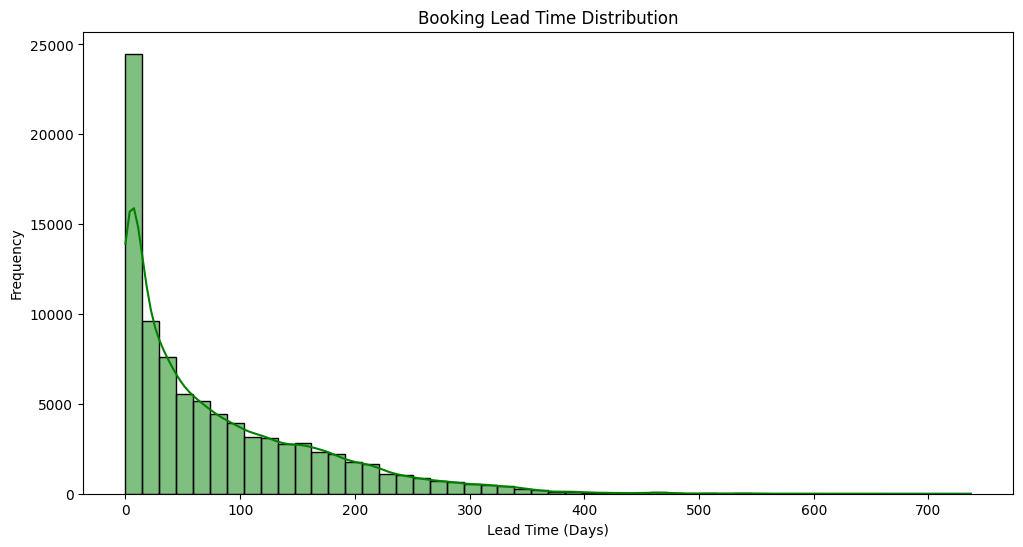

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(df['lead_time'], bins=50, kde=True, color="green")
plt.title("Booking Lead Time Distribution")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Frequency")
plt.show()